In [1]:
# a) libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pandas import set_option


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error

In [2]:
# b) Load dataset
train=pd.read_excel("C:\\Users\\Varsha Pawar\\Documents\\Dataset_ml_r\\flight prediction\\Data_Train.xlsx")
test=pd.read_excel("C:\\Users\\Varsha Pawar\\Documents\\Dataset_ml_r\\flight prediction\\Test_set.xlsx")

In [3]:
train.shape

(10683, 11)

In [4]:
test.shape

(2671, 10)

In [5]:
train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
train.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [9]:
train.isnull().sum()[train.isnull().sum()!=0]

Route          1
Total_Stops    1
dtype: int64

In [10]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [11]:
train['Route']=train['Route'].fillna(train['Route'].value_counts().index[0])
train['Route'].isnull().sum()

0

In [12]:
train['Total_Stops']=train['Total_Stops'].fillna(train['Total_Stops'].value_counts().index[0])
train['Total_Stops'].isnull().sum()

0

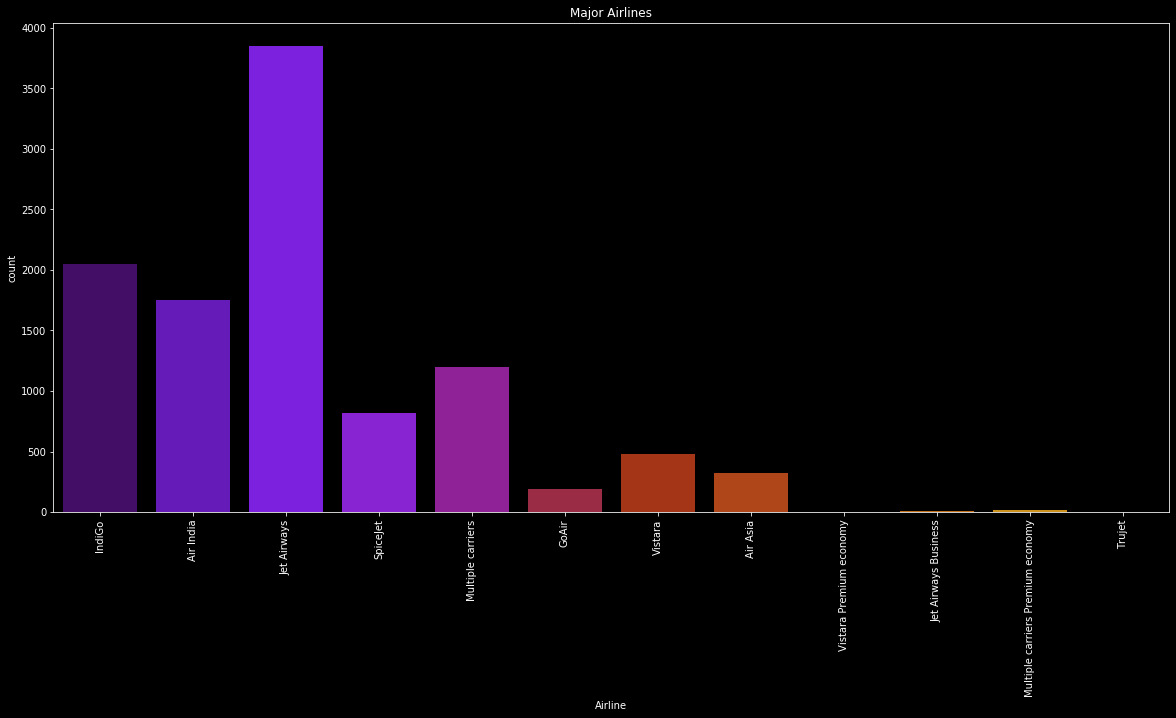

In [13]:
#Univariate Visualisation

plt.rcParams['figure.figsize']=(20,9)
plt.style.use('dark_background')

sns.countplot(train['Airline'],palette='gnuplot')

plt.title("Major Airlines")
plt.xticks(rotation=90)
plt.show()


In [14]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

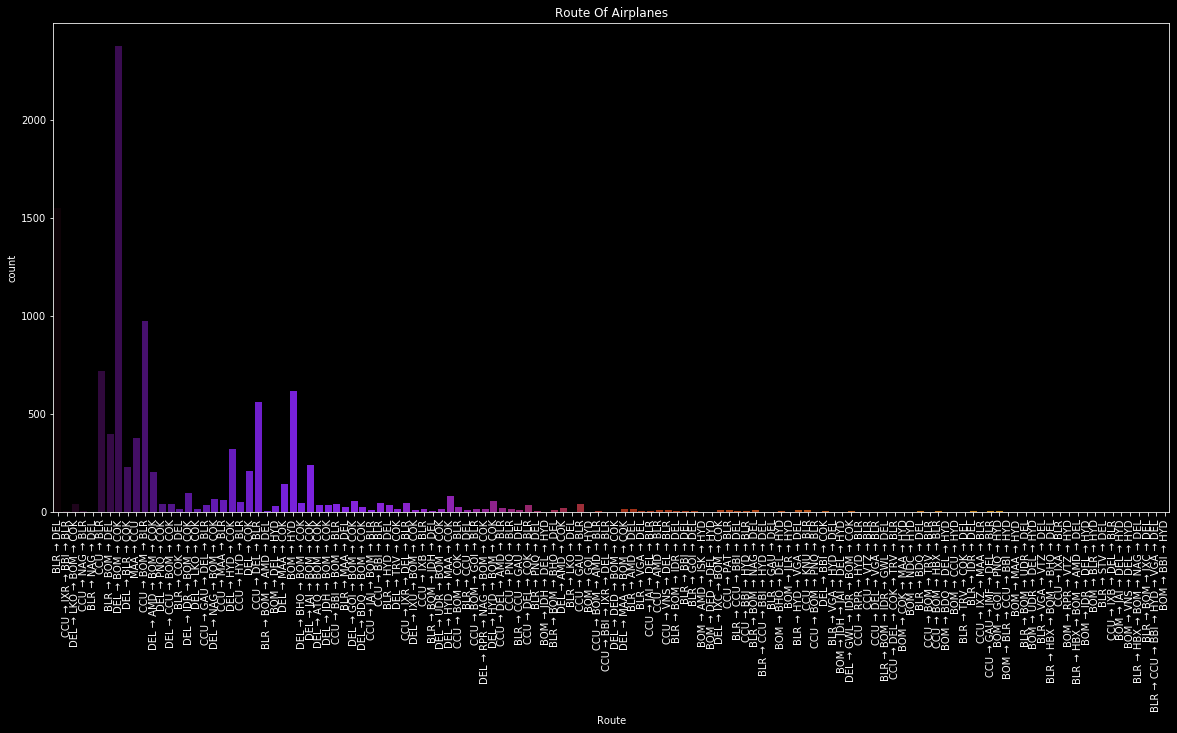

In [16]:
plt.rcParams['figure.figsize']=(20,9)
plt.style.use('dark_background')

sns.countplot(train['Route'],palette='gnuplot')

plt.title("Route Of Airplanes")
plt.xticks(rotation=90)
plt.show()

In [17]:
#the plot shows that most of the passangers prefer Jet- Airways 
#and most of them are travelling via route DEL-BOM-COK

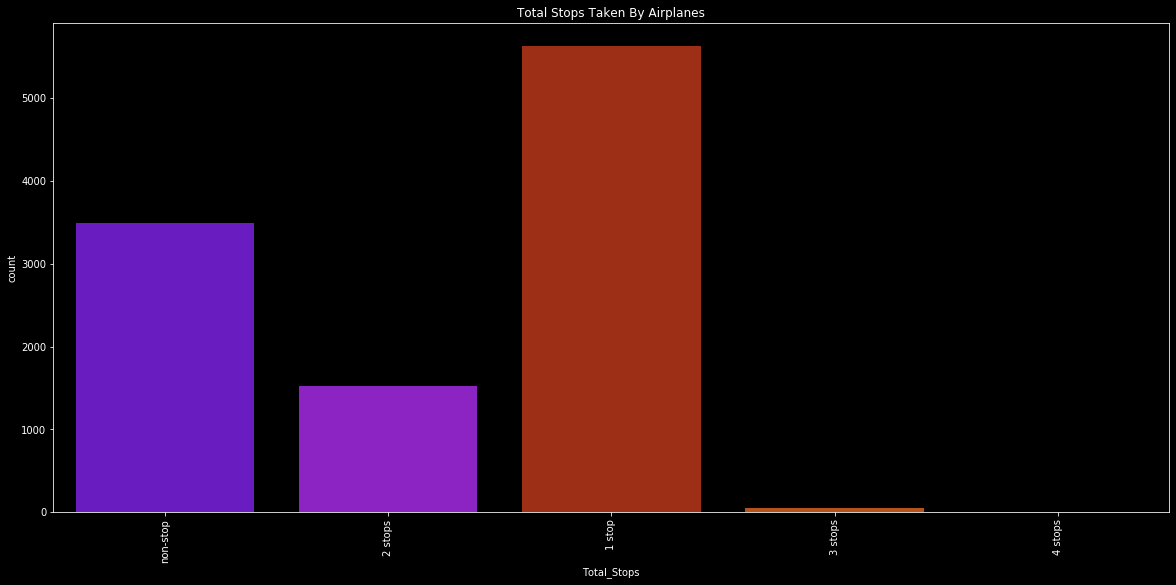

In [18]:
plt.rcParams['figure.figsize']=(20,9)
plt.style.use('dark_background')

sns.countplot(train['Total_Stops'],palette='gnuplot')

plt.title("Total Stops Taken By Airplanes")
plt.xticks(rotation=90)
plt.show()

In [19]:
#Many Airplanes only take one stop, some airplanes takes 2 stops and more than 3000+ don't take any stops

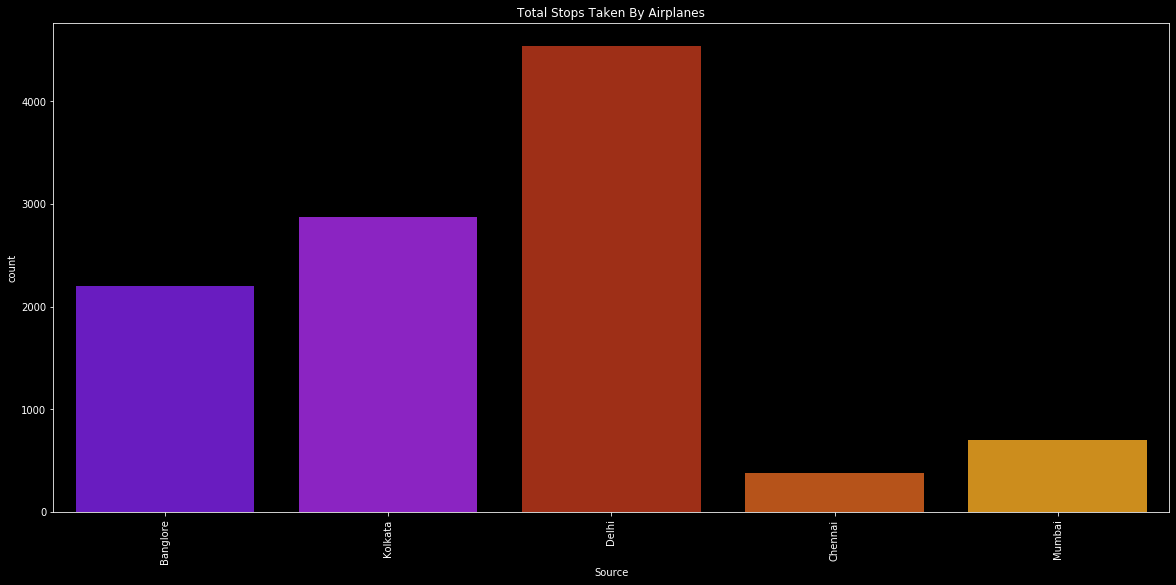

In [20]:
plt.rcParams['figure.figsize']=(20,9)
plt.style.use('dark_background')

sns.countplot(train['Source'],palette='gnuplot')

plt.title("Total Stops Taken By Airplanes")
plt.xticks(rotation=90)
plt.show()

In [21]:
#We can say that many passengers are flying from Delhi

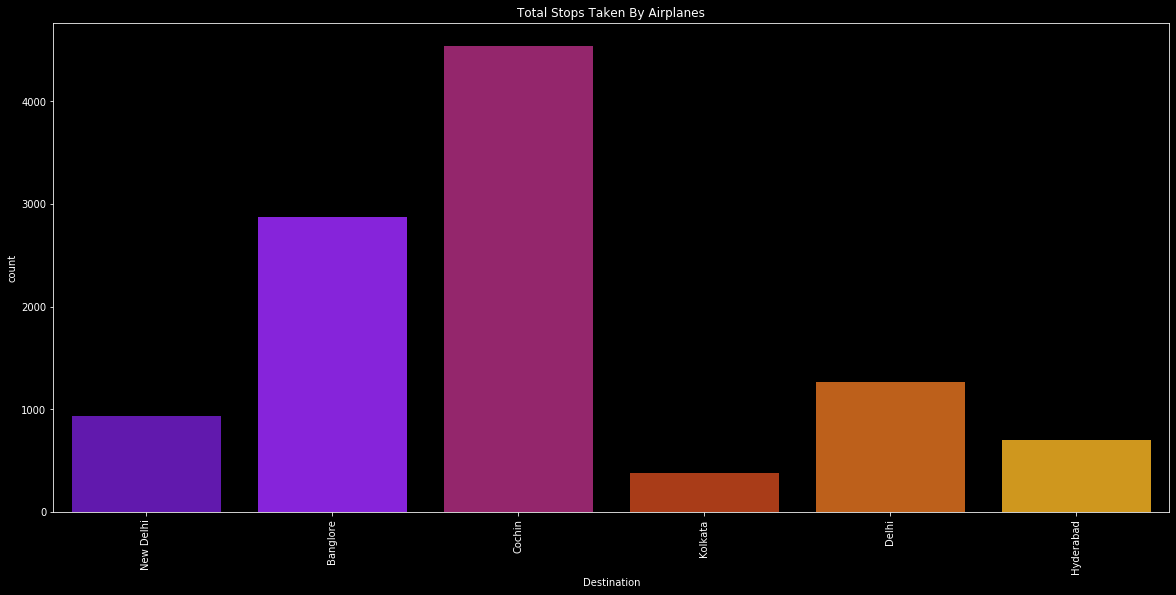

In [22]:
plt.rcParams['figure.figsize']=(20,9)
plt.style.use('dark_background')

sns.countplot(train['Destination'],palette='gnuplot')

plt.title("Total Stops Taken By Airplanes")
plt.xticks(rotation=90)
plt.show()

In [23]:
#And many passengers are going to Cochin

In [24]:
train['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

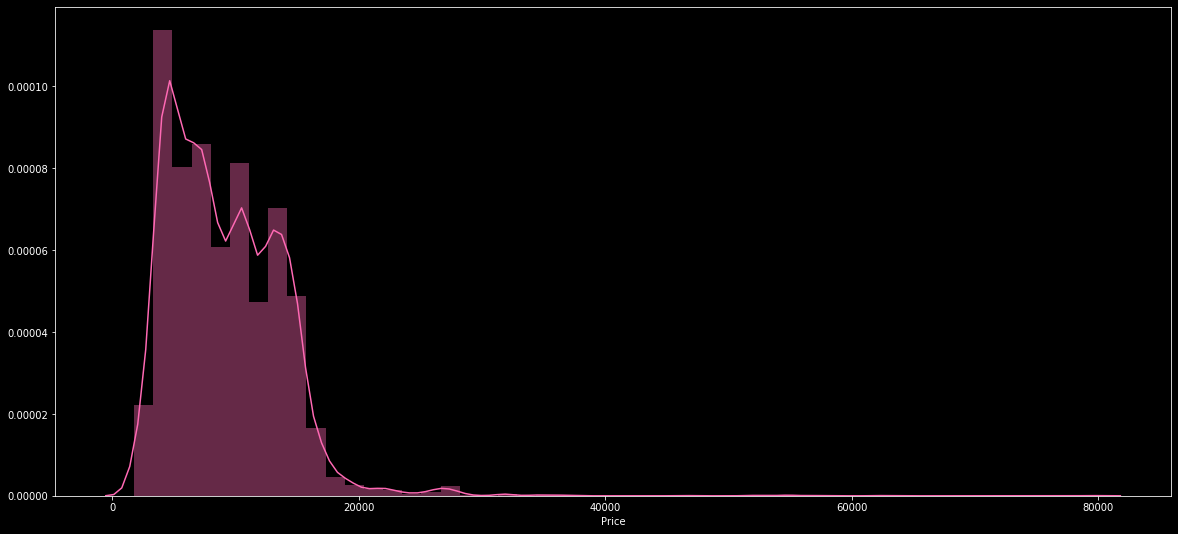

In [25]:
sns.distplot(train['Price'],color='hotpink')

In [26]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

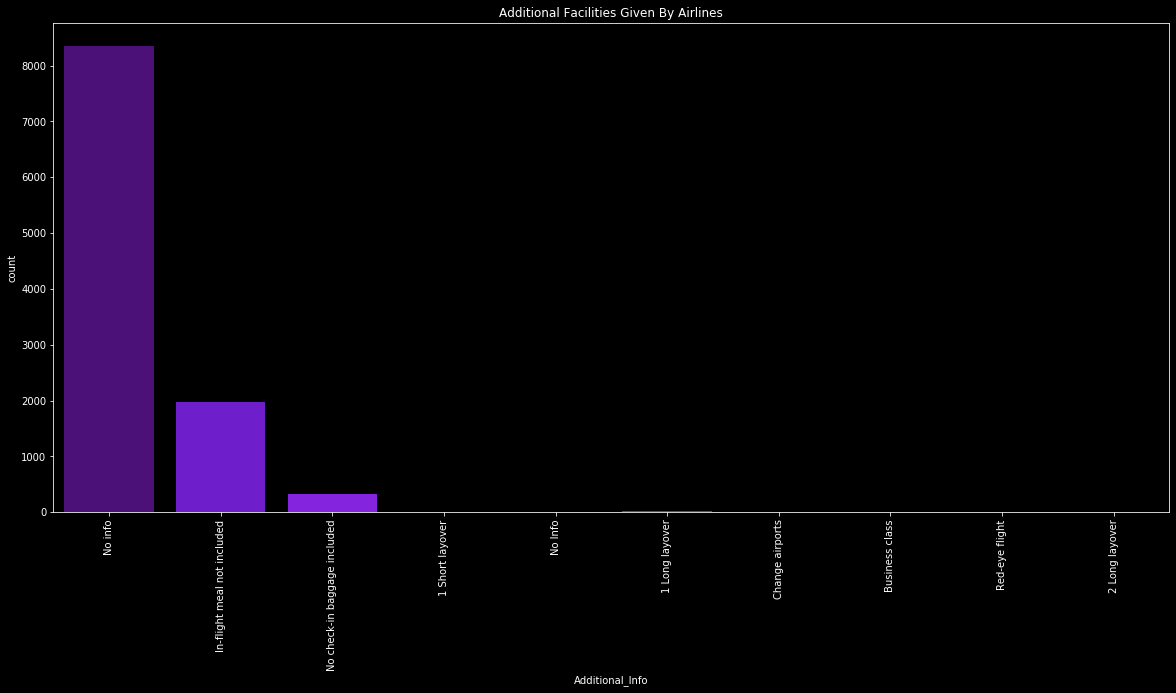

In [27]:
plt.rcParams['figure.figsize']=(20,9)
plt.style.use('dark_background')

sns.countplot(train['Additional_Info'],palette='gnuplot')

plt.title("Additional Facilities Given By Airlines")
plt.xticks(rotation=90)
plt.show()

In [28]:
#as the plot is positively skewed, which means prices of the airplanes when given additional facilities

In [29]:
####Bivariate Plots
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

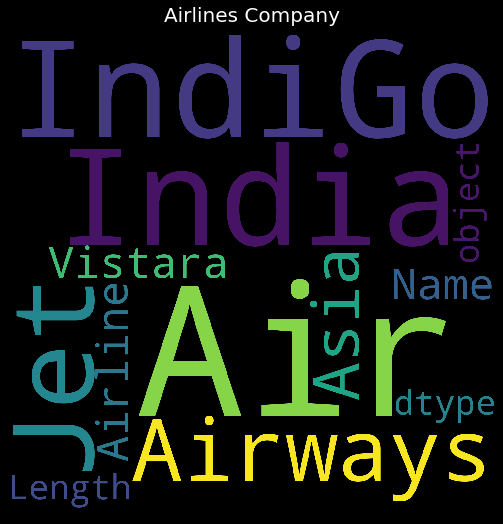

In [30]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10,9)
plt.style.use('dark_background')

wc = WordCloud(background_color = 'black', width = 1500, height = 1500).generate(str(train['Airline']))
plt.title('Airlines Company', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()


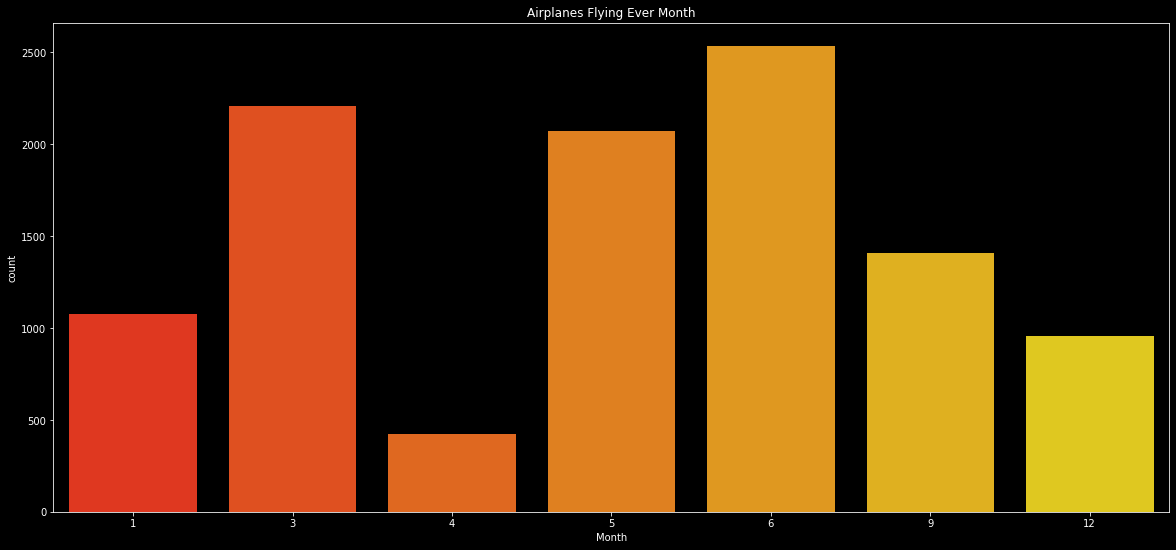

In [31]:
train['Date_of_Journey']=pd.to_datetime(train['Date_of_Journey'])
train['Month']=train['Date_of_Journey'].dt.month

plt.style.use('dark_background')
plt.rcParams['figure.figsize']=(20,9)

sns.countplot(train['Month'],palette='autumn')
plt.title('Airplanes Flying Ever Month')

plt.show()

In [32]:
#looking at the plot we can state that, most of the peoples likes to go to other cities in
#3rd, 5th and 6th month, 
#peoples like to spend their summer vaccation in other cities

In [33]:
train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

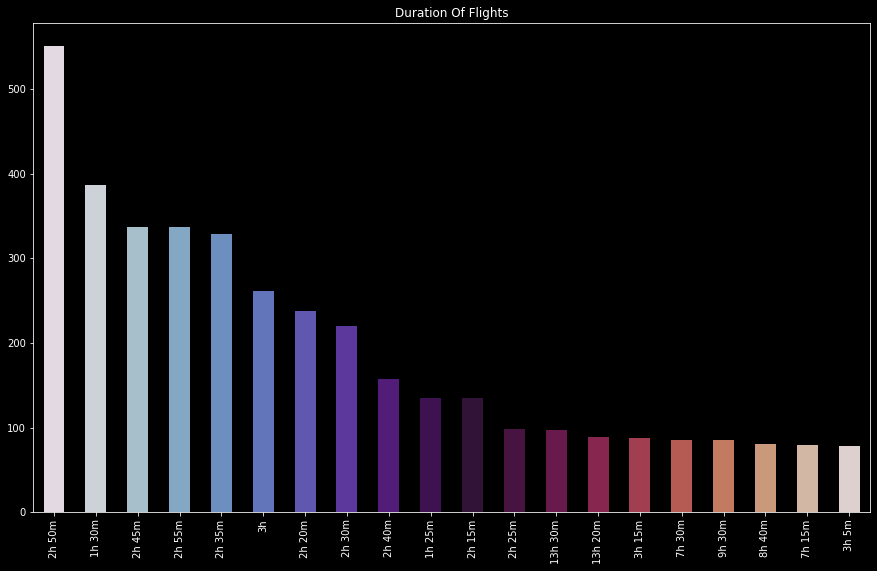

In [34]:
import warnings
warnings.filterwarnings('ignore')

color=plt.cm.twilight(np.linspace(0,5,100))
train['Duration'].value_counts().head(20).plot.bar(color=color,figsize=(15,9))
plt.title('Duration Of Flights')
plt.show()


In [35]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
4h 10m       1
40h 20m      1
31h 30m      1
5m           1
27h 55m      1
Name: Duration, Length: 368, dtype: int64

In [36]:
#so most of the flight duration is 2hr 50min

In [37]:
####Bivariate Visualization 
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month'],
      dtype='object')

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

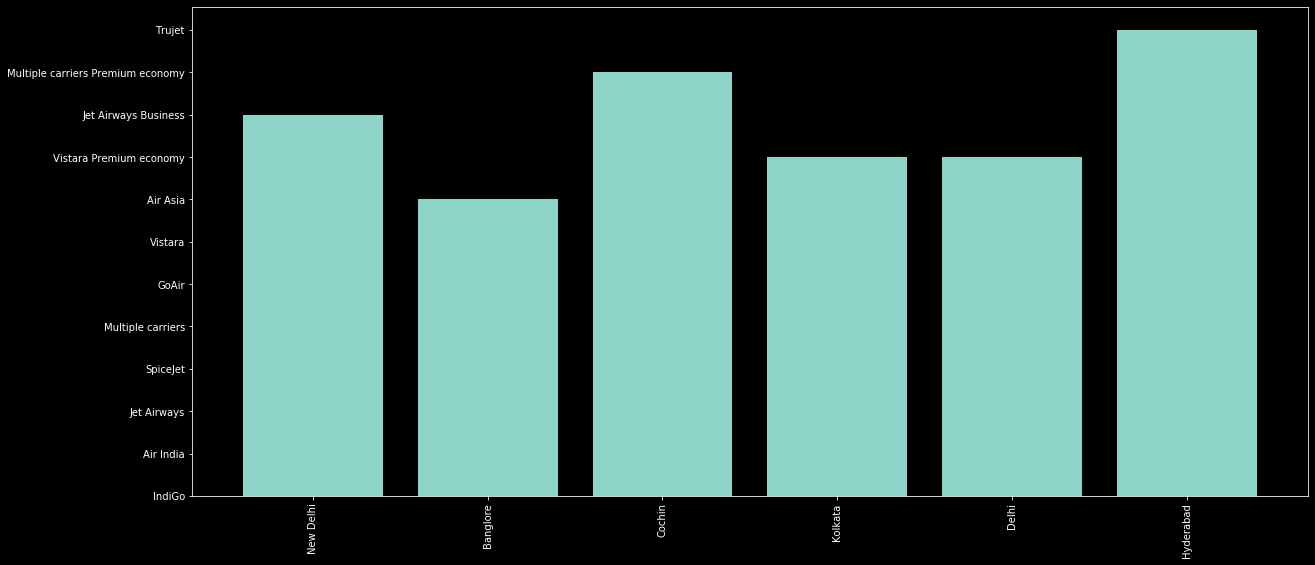

In [55]:
plt.bar(train['Destination'],train['Airline'])
plt.xticks(rotation=90)

In [64]:
pd.crosstab([train['Source'],train['Destination']],train['Airline'],margins=True)

Airline               Air Asia  Air India  GoAir  IndiGo  Jet Airways  \
Source   Destination                                                    
Banglore Delhi              71        120     69     366          370   
         New Delhi          18        212     24     157          418   
Chennai  Kolkata             0         25      0     184            0   
Delhi    Cochin             80        747     76     705         1586   
Kolkata  Banglore          150        512     25     445         1256   
Mumbai   Hyderabad           0        136      0     196          219   
All                        319       1752    194    2053         3849   

Airline               Jet Airways Business  Multiple carriers  \
Source   Destination                                            
Banglore Delhi                           0                  0   
         New Delhi                       4                  0   
Chennai  Kolkata                         0                  0   
Delhi    Cochin                          2               1196   
Kolkata  Banglore                        0                  0   
Mumbai   Hyderabad                       0                  0   
All                                      6               1196   

Airline               Multiple carriers Premium economy  SpiceJet  Trujet  \
Source   Destination                                                        
Banglore Delhi                                        0       137       0   
         New Delhi                                    0        44       0   
Chennai  Kolkata                                      0       128       0   
Delhi    Cochin                                      13        87       0   
Kolkata  Banglore                                     0       300       0   
Mumbai   Hyderabad                                    0       122       1   
All                                                  13       818       1   

Airline               Vistara  Vistara Premium economy    All  
Source   Destination                                           
Banglore Delhi            131                        1   1265  
         New Delhi         54                        1    932  
Chennai  Kolkata           43                        1    381  
Delhi    Cochin            45                        0   4537  
Kolkata  Banglore         183                        0   2871  
Mumbai   Hyderabad         23                        0    697  
All                       479                        3  10683

In [ ]:
#now the table confirms the statement that,  most of the passengers are travelling from
#delhi to Cochin by Jet Airways
#jet Airways are also high in demand by passengers traveling from Kolkalta to Banglore

In [203]:
train['Total_Stops']=train['Total_Stops'].replace(train)

#


In [209]:
#train=train.drop('Route',axis=1)
train=train.drop(['Hours','Minutes','Duration_Hours','Duration_Minutes'],axis=1)


In [210]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Dep_Time_Hours,dep_time_session,Duration_hrs
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,22,Night,2
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Morning,7
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,9,Morning,19
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,18,Evening,5
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,16,Noon,4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

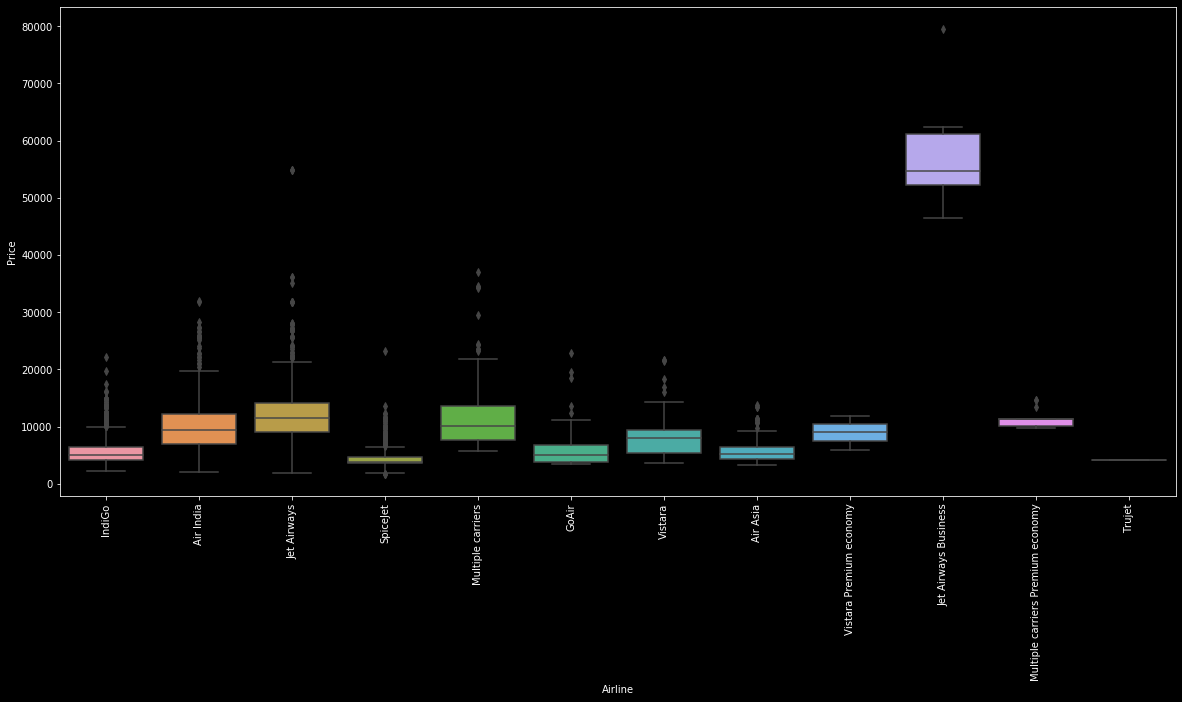

In [97]:
sns.boxplot(train['Airline'],train['Price'])
plt.xticks(rotation=90)

In [107]:
pd.crosstab(train['Total_Stops'],train['Airline'])

Airline,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
Total_Stops,,,,,,,,,,,,
1 stop,129,541,102,793,2535,4,1145,13,148,1,215,0
2 stops,9,756,0,19,691,2,43,0,0,0,0,0
3 stops,0,37,0,0,0,0,8,0,0,0,0,0
4 stops,0,1,0,0,0,0,0,0,0,0,0,0
non-stop,181,417,92,1241,623,0,0,0,670,0,264,3


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

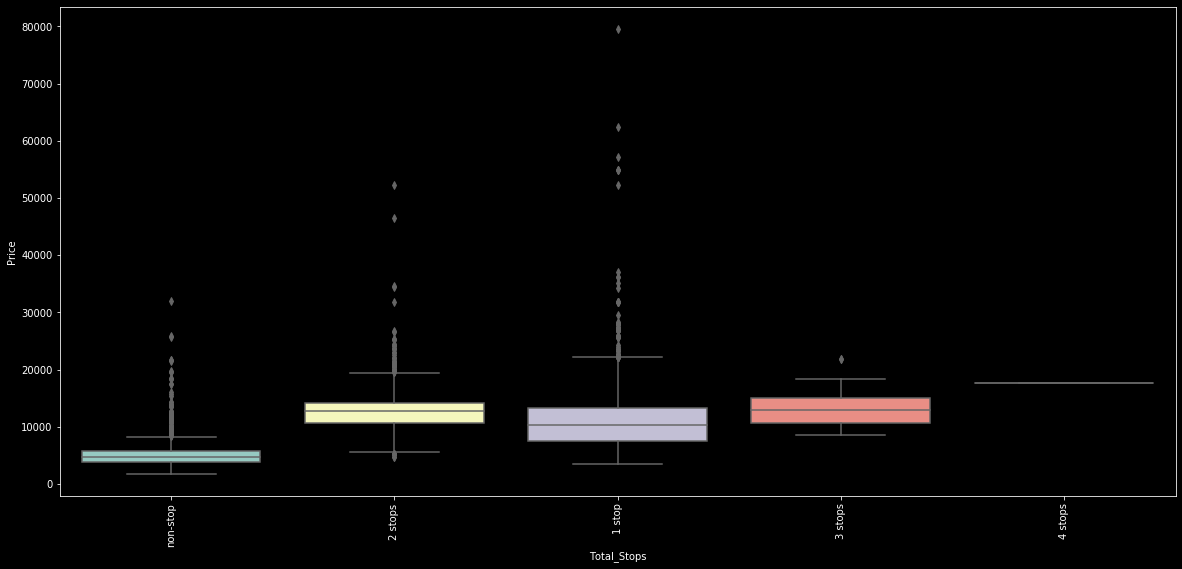

In [102]:
sns.boxplot(train['Total_Stops'],train['Price'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

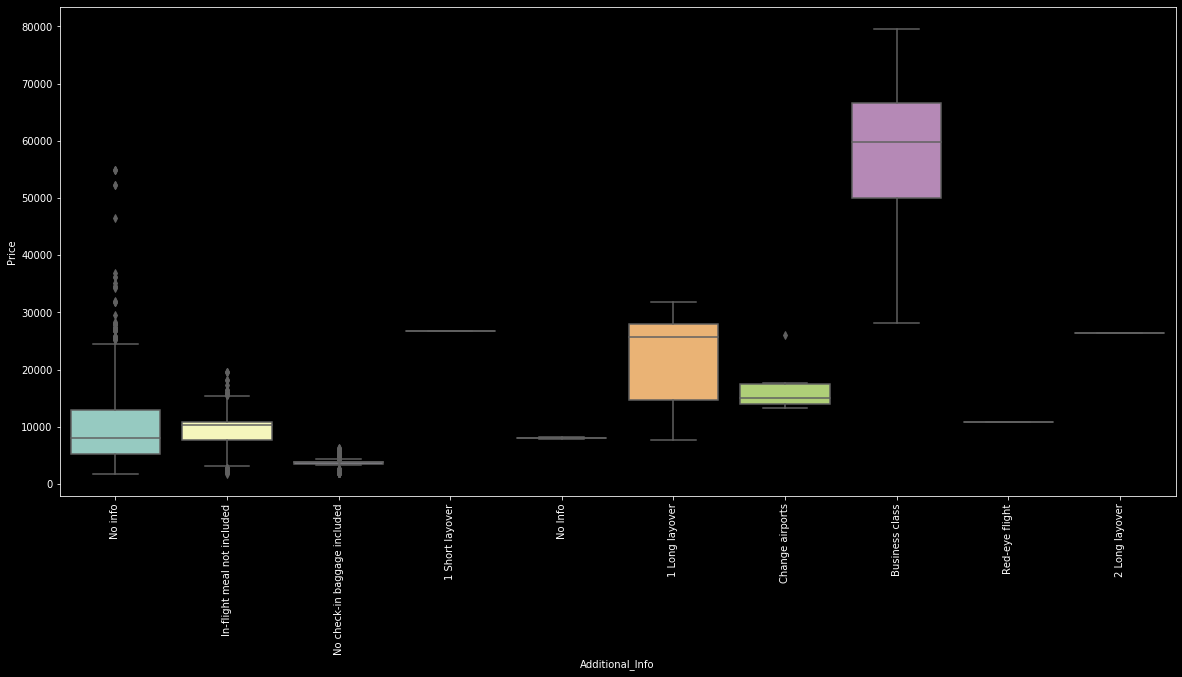

In [122]:
sns.boxplot(train['Additional_Info'],train['Price'])
plt.xticks(rotation=90)

In [ ]:
#Peoples pay higher price for Jet Airways to travel from Delhi to Cochin which has only one stop in between 
#also obv  peoples who like to fly in business class are likely to pay more money than others

In [137]:
train['Dep_Time_Hours']=train['Dep_Time'].apply(lambda x: x[0:2])

In [211]:
dep_time=train['Dep_Time_Hours'].astype('int64')

for i, value in enumerate(dep_time):
    if value >=0 and value <12:
        dep_time[i]="Morning "
    elif value >=12 and value<17:
        dep_time[i]="Noon "
    elif value>=17 and value<20:
        dep_time[i]='Evening'
    else:
        dep_time[i]="Night"
train['dep_time_session']=dep_time

train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Dep_Time_Hours,dep_time_session,Duration_hrs
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,22,Night,2
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Morning,7
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,9,Morning,19
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,18,Evening,5
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,16,Noon,4


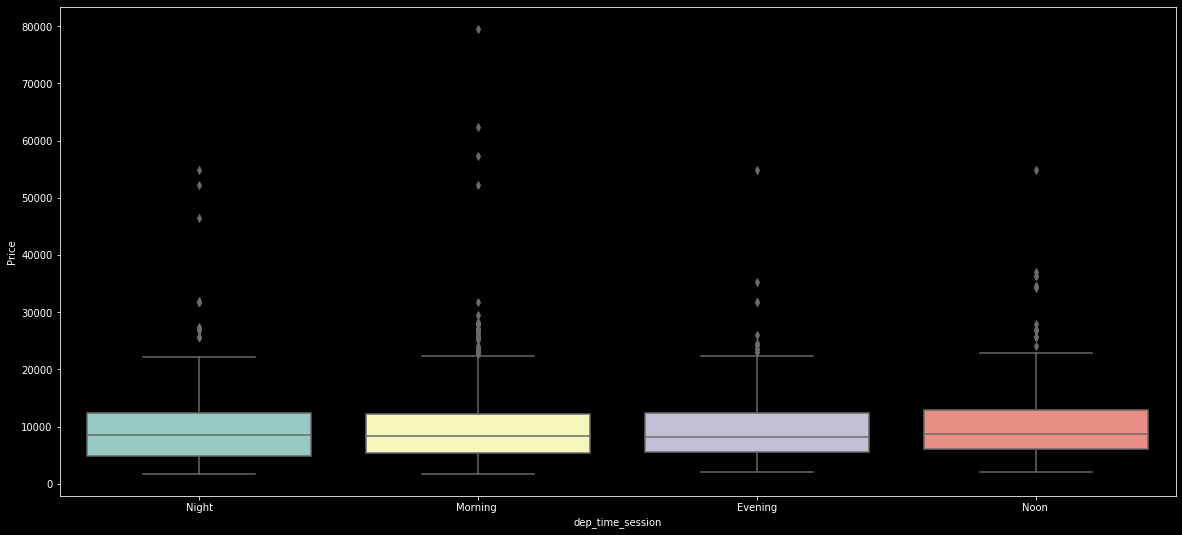

In [162]:
sns.boxplot(train['dep_time_session'],train['Price'])


In [174]:
#it shows that morning flights have more outliers, that says the morning tickets are costlier
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Month', 'Duration_Hours', 'Duration_Minutes', 'Dep_Time_Hours',
       'dep_time_session'],
      dtype='object')

In [248]:
import re
hours=train['Duration'].apply(lambda x: x[0:2])
mins=train['Duration'].apply(lambda x: x[3:6])
hou=[]
mini=[]
for i in hours:
    hou.append(int(re.sub("\D","",i)))
    
for j,value in enumerate(mins):
     if value =='':
            mins[j]='00m'
for k in mins:
    mini.append(int(re.sub("\D","",k)))
train['duration_mins']=mini
train['duration_mins'].head(10)

0    50
1    25
2     0
3    25
4    45
5    25
6    30
7     5
8    30
9    50
Name: duration_mins, dtype: int64

In [259]:
dur_min=train['duration_mins']
mn=[]
for i in dur_min:
    mn.append(dur_min[i]/60)
mn

[0.25,
 0.16666666666666666,
 0.8333333333333334,
 0.16666666666666666,
 0.8333333333333334,
 0.16666666666666666,
 0.25,
 0.4166666666666667,
 0.25,
 0.25,
 0.5833333333333334,
 0.4166666666666667,
 0.5833333333333334,
 0.25,
 0.4166666666666667,
 0.4166666666666667,
 0.25,
 0.4166666666666667,
 0.8333333333333334,
 0.4166666666666667,
 0.25,
 0.16666666666666666,
 0.25,
 0.25,
 0.16666666666666666,
 0.25,
 0.8333333333333334,
 0.25,
 0.25,
 0.5833333333333334,
 0.5833333333333334,
 0.16666666666666666,
 0.25,
 0.8333333333333334,
 0.25,
 0.16666666666666666,
 0.5833333333333334,
 0.25,
 0.5833333333333334,
 0.25,
 0.4166666666666667,
 0.25,
 0.4166666666666667,
 0.8333333333333334,
 0.8333333333333334,
 0.25,
 0.25,
 0.5833333333333334,
 0.4166666666666667,
 0.25,
 0.5833333333333334,
 0.16666666666666666,
 0.25,
 0.8333333333333334,
 0.25,
 0.5833333333333334,
 0.4166666666666667,
 0.5833333333333334,
 0.25,
 0.4166666666666667,
 0.16666666666666666,
 0.16666666666666666,
 0.5833333

In [ ]:
if train['T']